### Import libraries and upload datasets

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [150]:
df = pd.read_csv("C:\\Users\\NAVYA JYOTI\\Desktop\\New folder (2)\\Python_dataset\\HR_comma_sep.csv")

In [151]:
pd.set_option('display.max_columns', None) 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [153]:
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

## EDA

1. handle missing values

In [154]:
#check nan values present in each features:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

2. Identification of types of variables (numerical and categorical)

In [214]:
#numerical varidables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  8


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [156]:
#numerical varidables
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
df[categorical_features].head()

Number of categorical variables:  2


,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [157]:
# no of employee who left the company 
print("The Number of employee who left the company :",len(df[df['left']==1]))
print("The Number of employee who didn't left the company",len(df[df['left']==0]))
print("The proportion of employee who left",len(df[df['left']==1])/len(df))

The Number of employee who left the company : 3571
The Number of employee who didn't left the company 11428
The proportion of employee who left 0.2380825388359224


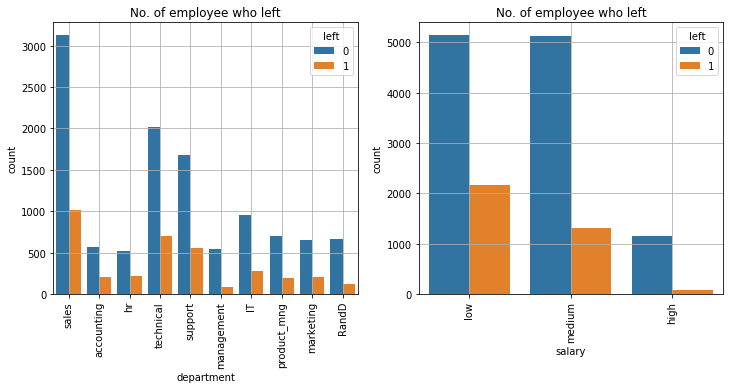

In [158]:
# here we will do it only for categorical variable
fig=plt.subplots(figsize=(12,5))# to define the size of figure
length=len(categorical_features) # no of categorical and ordinal variable
for i,j in itertools.zip_longest(categorical_features,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(np.ceil(length/2),2,j+1) # this is to plot the subplots like as 2,2,1 it means 2x2 matrix and graph at 1 
    plt.subplots_adjust(hspace=.5) # to adjust the distance between subplots
    sns.countplot(x=i,data = df,hue="left") # To plot the countplot of variable with hue left
    plt.xticks(rotation=90) # to rotate the xticks by 90 such that no xtixks overlap each other
    plt.title("No. of employee who left") # to plot the title of graph
    plt.grid()

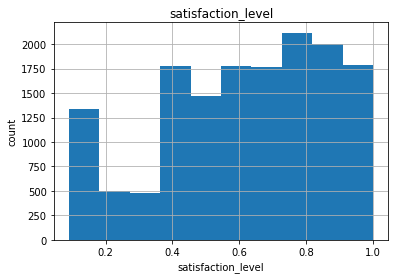

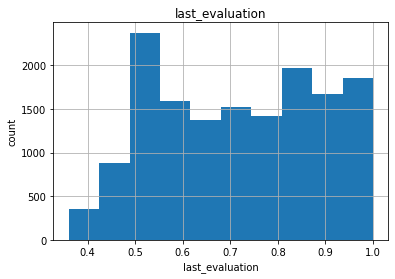

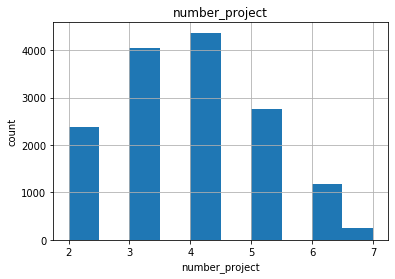

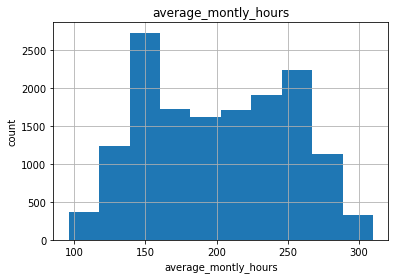

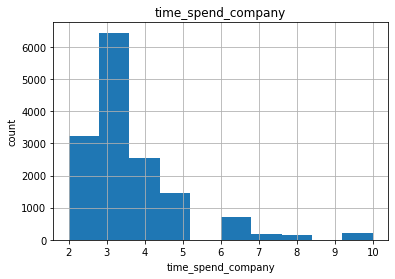

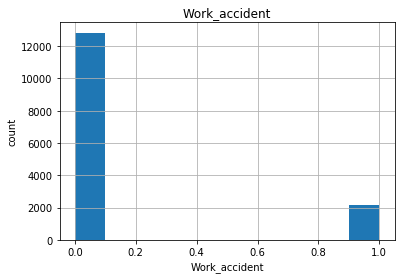

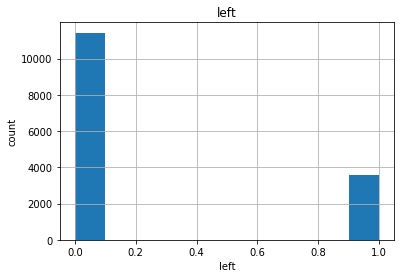

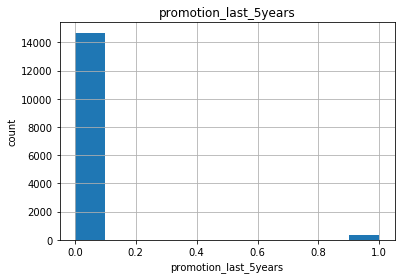

In [159]:
#understand distribution by analysing the continuous variables by creating histograms
for feature in numerical_features:
    data = df.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

### 3. Investigating outliers

In [160]:
df.describe(percentiles=[.9,.95,.97,.99]).T

,count,mean,std,min,50%,90%,95%,97%,99%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.64,0.92,0.96,0.98,0.99,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.72,0.95,0.98,0.99,1.00,1.0
number_project,14999.0,3.803054,1.232592,2.00,4.00,5.00,6.00,6.00,7.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,200.00,267.00,275.00,284.00,301.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,5.00,6.00,7.00,10.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,1.00,1.00,1.00,1.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,1.00,1.00,1.00,1.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,0.00,1.00,1.0


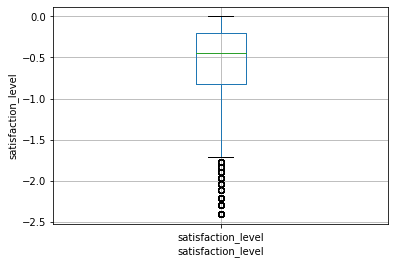

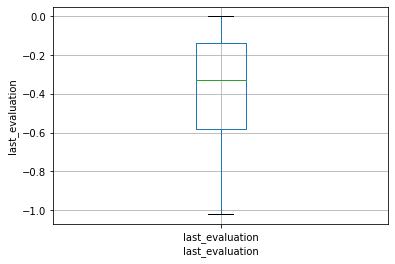

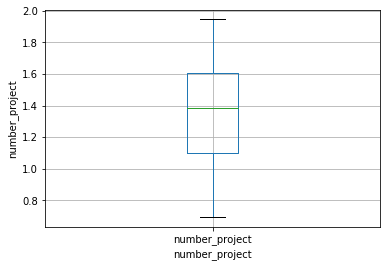

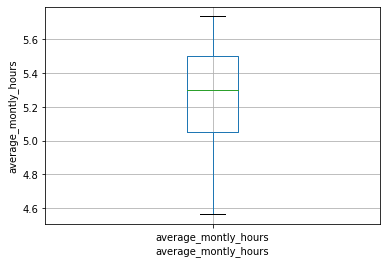

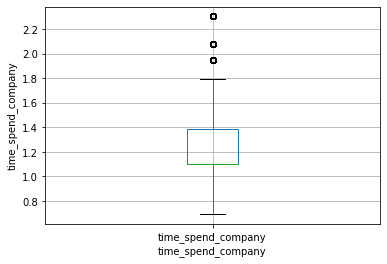

In [161]:
#find if outliers exist
for feature in numerical_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)  
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

# Visualization

<Figure size 1800x720 with 0 Axes>

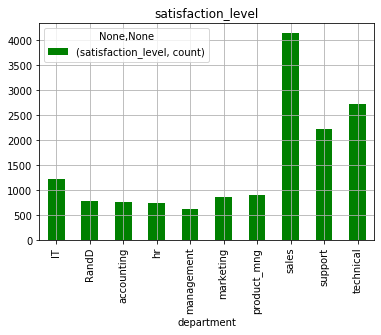

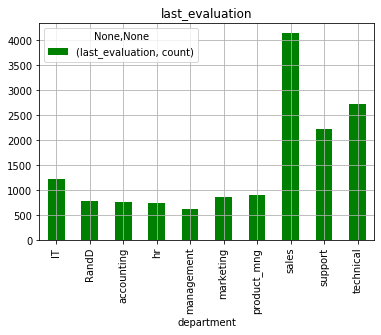

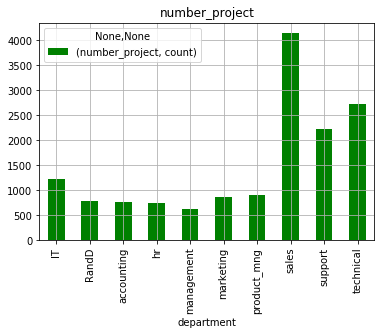

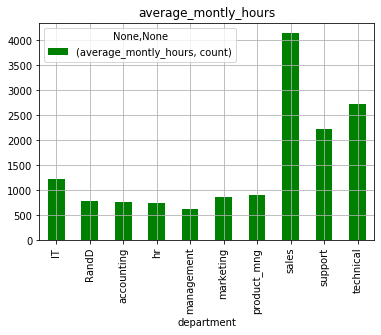

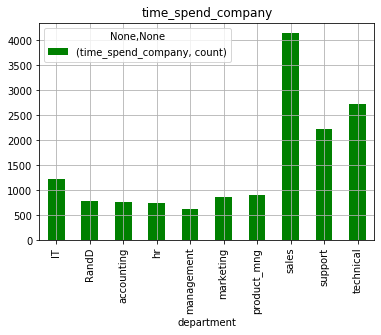

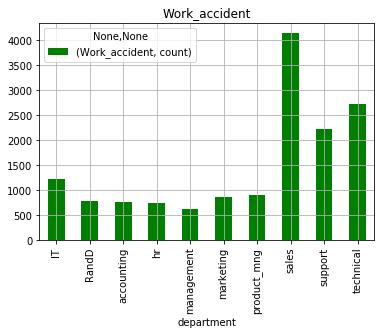

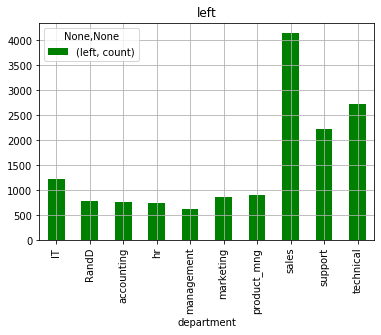

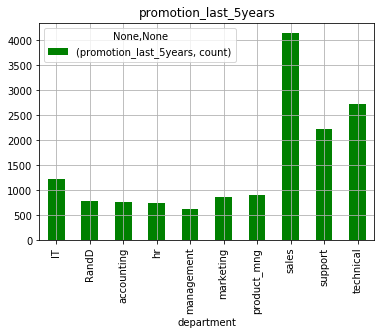

In [162]:
# graphs comparing department with other numerical feature count

plt.figure(figsize=(25,10))
for feature in numerical_features:
    age_income1=df.groupby(['department']).agg({feature:['count']})
    age_income1.plot(kind='bar', color='green')
    plt.title(feature)
    plt.grid()
    plt.show()

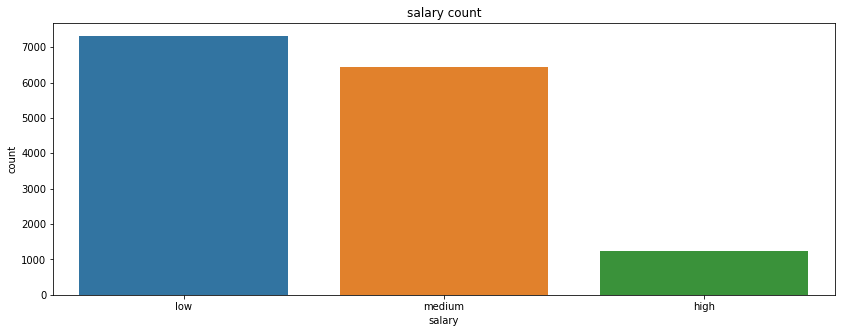

In [165]:
plt.figure(figsize=(14,5))
plt.title('salary count')
sns.countplot(x='salary',data=df)

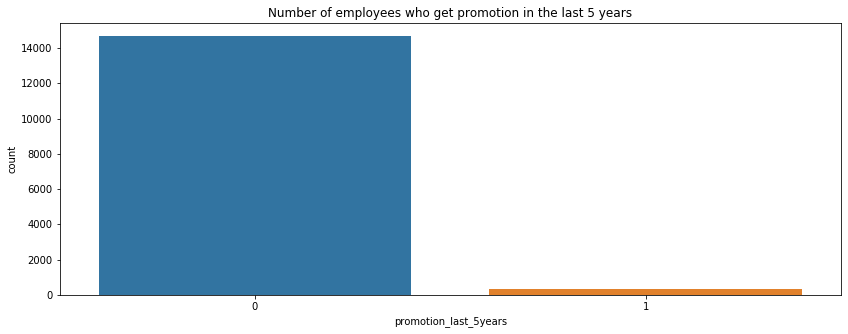

In [166]:
plt.figure(figsize=(14,5))
# Number of employees who get promotion in the last 5 years
sns.countplot(x=df.promotion_last_5years, data=df)
plt.title("Number of employees who get promotion in the last 5 years")
plt.show()

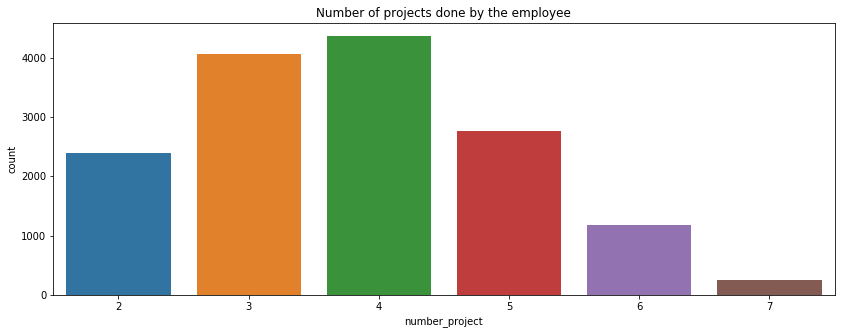

In [168]:
plt.figure(figsize=(14,5))

# Number of employees who get promotion in the last 5 years
sns.countplot(x=df.number_project, data=df)
plt.title("Number of projects done by the employee")
plt.show()

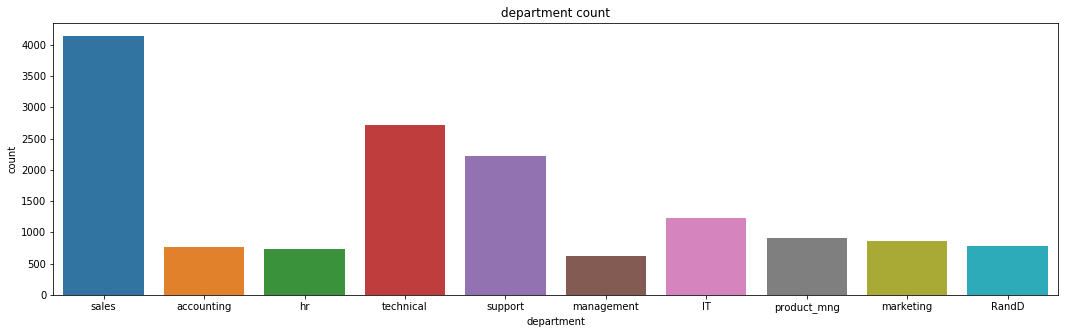

In [169]:
plt.figure(figsize=(18,5))
plt.title('department count')
sns.countplot(x='department',data=df)

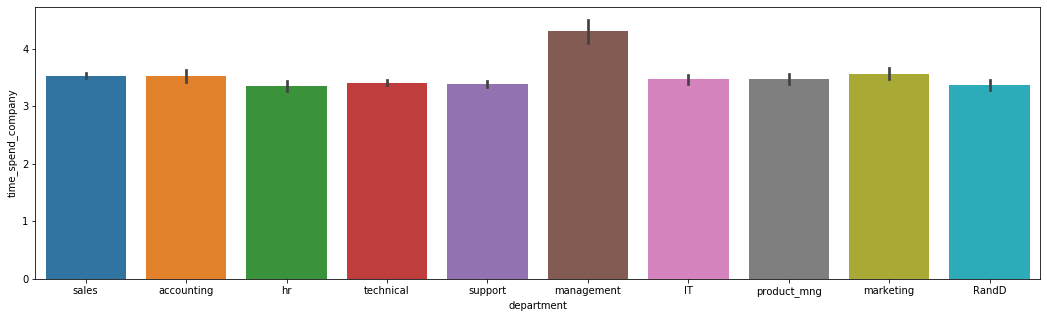

In [170]:
#plot the graph to see employees of which department spent the most time in the company
plt.figure(figsize=(18,5))
sns.barplot(x = 'department', y = 'time_spend_company',data = df)
plt.show()

In [171]:
Proportion_of_data = df.groupby(["department"])["Work_accident"].agg(lambda x: (x==1).sum()).reset_index()# only counting the number who left 
Proportion_of_data1=df.groupby(["department"])["Work_accident"].count().reset_index() # Counting the total number 
Proportion_of_data2 = pd.merge(Proportion_of_data,Proportion_of_data1,on='department') # mergeing two data frames

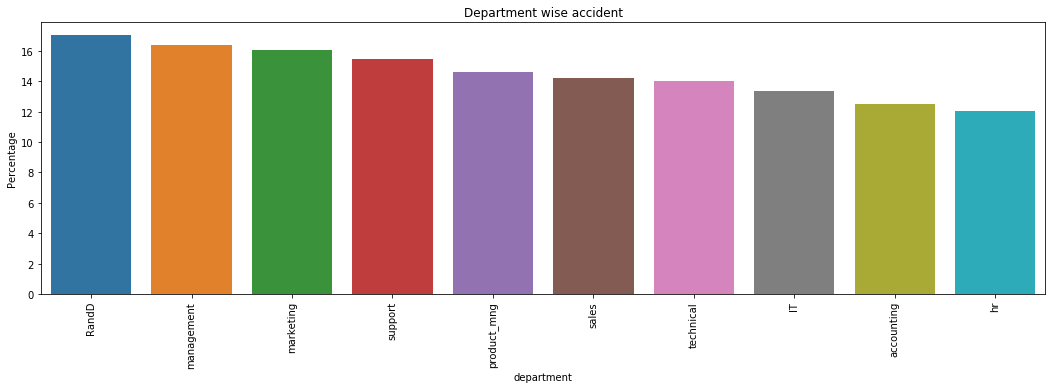

In [173]:
plt.figure(figsize=(18,5))
# Now we will calculate the % of employee who category wise
Proportion_of_data2["Proportion"]=(Proportion_of_data2['Work_accident_x']/Proportion_of_data2['Work_accident_y'])*100 
Proportion_of_data2=Proportion_of_data2.sort_values(by="Proportion",ascending=False).reset_index(drop=True)#sorting by percentage
sns.barplot(x='department',y='Proportion',data=Proportion_of_data2)
plt.xticks(rotation=90)
plt.title('Department wise accident')
plt.ylabel('Percentage')
plt.show()

# Feature Engineering

In [174]:
# Now we have to predict who will left the company before going ahead lets do a part of feature engineering selecting import

# Let's plot the correlation Matrix
corr= df.corr()
#corr

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

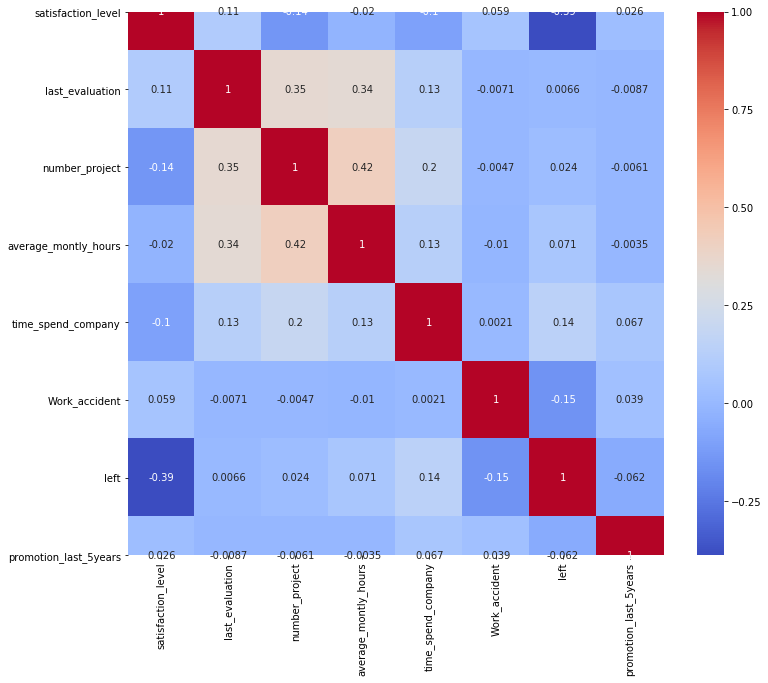

In [175]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)

### Label Encoding

In [176]:
from sklearn.preprocessing import LabelEncoder # For change categorical variable into int
from sklearn.metrics import accuracy_score 
le=LabelEncoder()
data = df.copy()
def encod(dataset):
    dataset['salary']=le.fit_transform(dataset['salary'])
    dataset['department']=le.fit_transform(dataset['department'])
    return dataset

In [178]:
encod(data)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


### Standardization of the data using Standard Scaler

In [215]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)

# print scaled data
print(scaled_data)

[[-0.93649469 -1.08727529 -1.46286291 ... -0.14741182  0.39372503
  -0.55495458]
 [ 0.75281433  0.84070693  0.97111292 ... -0.14741182  0.39372503
   1.04300352]
 [-2.02247906  0.95755433  2.59376348 ... -0.14741182  0.39372503
   1.04300352]
 ...
 [-0.97671633 -1.08727529 -1.46286291 ... -0.14741182  0.74231612
  -0.55495458]
 [-2.02247906  1.42494396  1.7824382  ... -0.14741182  0.74231612
  -0.55495458]
 [-0.97671633 -1.14569899 -1.46286291 ... -0.14741182  0.74231612
  -0.55495458]]


In [ ]:
#scaled data is not used here because we did not used the Algorithms where Feature Scaling matters 


# model

In [180]:
# Importing Machine learning models library used for classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC

In [181]:
# we can select importance features by using Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100)

In [182]:
feature_var = data.loc[:,data.columns != "left"]
pred_var = data.loc[:,data.columns=='left']
model.fit(feature_var,pred_var.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:
featimp = pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)
print(featimp)

satisfaction_level       0.334528
number_project           0.188543
time_spend_company       0.178197
average_montly_hours     0.144134
last_evaluation          0.127195
department               0.012038
salary                   0.008723
Work_accident            0.005710
promotion_last_5years    0.000931
dtype: float64


In [184]:
def Classification_model(model,df,x,y): # here x is the variable which are used for prediction
    # y is the prediction variable
    train,test = train_test_split(df,test_size= 0.33)
    train_x = df.loc[train.index,x] # Data for training only with features
    train_y = df.loc[train.index,y] # Data for training only with predcition variable
    test_x = df.loc[test.index,x] # same as for training 
    test_y = df.loc[test.index,y]
    model.fit(train_x,train_y.values.ravel())
    pred=model.predict(test_x)
    accuracy=accuracy_score(test_y,pred)
    return accuracy

In [185]:
All_features = df.drop('left', axis='columns')
All_features = All_features.columns.tolist()
print(All_features)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary']


In [186]:
Important_features = featimp.iloc[:5].index.tolist()
print(Important_features)

['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation']


In [187]:
Pred_var = ["left"]
print(Pred_var)

['left']


Declare x and y variables

In [188]:
x = data.drop('left', axis='columns')
y = data.left

### handling imbalanced dataset

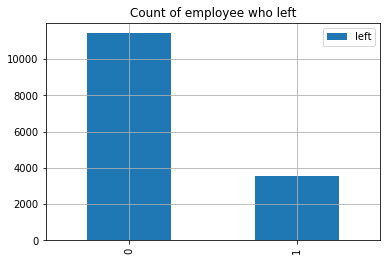

In [189]:
#check if the target variable has appropiate data
data.left.value_counts().plot(kind="bar")
plt.grid()
plt.title('Count of employee who left')
plt.legend()
plt.show()

In [190]:
# Printing number of samples in each class before Over-Sampling
t = [(d) for d in y if d==0]
s = [(d) for d in y if d==1]

print('Before Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

Before Over-Sampling: 
Samples in class 0:  11428
Samples in class 1:  3571


In [191]:
# Class count
class_0, class_1 = data['left'].value_counts()

# Divide by class
class_0 = data[data['left'] == 0]
class_1 = data[data['left'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (11428, 10)
class 1: (3571, 10)


In [192]:
from sklearn.utils import resample
# Upsampling minority class
class_0_new = resample(class_1,
                           # Upsample with replacement
                           replace=True,    
                           # Number to match majority class
                           n_samples=10000,   
                           random_state=10)

In [193]:
# Combine majority and upsampled minority class
sample = pd.concat([class_0, class_0_new])

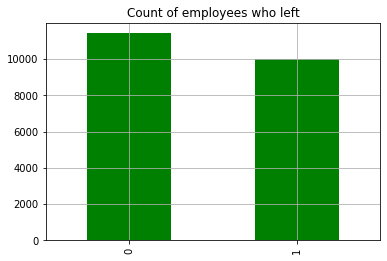

In [194]:
#graph shows if the dataset is now balanced or not
sample.left.value_counts().plot(kind="bar",color="green")
plt.title('Count of employees who left')
plt.grid()
plt.show()

# Training the model

In [195]:
#def imp_features(dataset):
#    dataset = dataset[dataset.columns[dataset.columns.isin(Important_features)]]
x= sample.drop('left', axis='columns')
y = sample.left

In [196]:
#imp_features(sample)

In [197]:
#splitting the dataset into training and test set 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

In [198]:
X_train.shape, X_test.shape

((17142, 9), (4286, 9))

In [199]:
y_train.shape, y_test.shape

((17142,), (4286,))

In [200]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\NAVYA JYOTI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
y_pred = model1.predict(X_test)

In [202]:
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7571


# Confusion Matrix and Classification report

In [203]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 

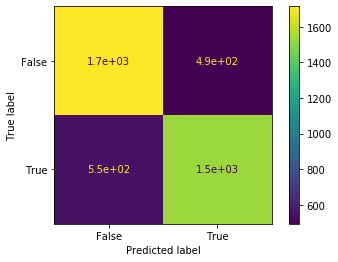

In [204]:
# display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [205]:
# Check accuracy score 
print('Model accuracy score : {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)))

Model accuracy score : 0.7571


In [206]:
# Check mse score 
print('Model mean absolute error : {0:0.4f}'. format(metrics.mean_absolute_error(y_test, y_pred)))

Model mean absolute error : 0.2429


In [207]:
from math import sqrt
# Check adj r^2 
print('Model adjusted r-sqaured : {0:0.4f}'.format(sqrt(metrics.mean_absolute_error(y_test, y_pred))))

Model adjusted r-sqaured : 0.4928


In [208]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2207
           1       0.76      0.74      0.75      2079

    accuracy                           0.76      4286
   macro avg       0.76      0.76      0.76      4286
weighted avg       0.76      0.76      0.76      4286



## prediction with a sample excel file

In [209]:
check1 = pd.read_excel("C:\\Users\\NAVYA JYOTI\\Desktop\\New folder (2)\\Python_dataset\\check_hr.xlsx")
check1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.11,0.92,7,293,4,0,0,sales,low
1,0.41,0.53,2,157,3,0,0,sales,low
2,0.84,0.96,4,247,5,0,0,sales,low
3,0.40,0.51,2,148,3,0,0,sales,low
4,0.58,0.74,4,215,3,0,0,sales,low


In [210]:
check1 = encod(check1)
check1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.11,0.92,7,293,4,0,0,0,0
1,0.41,0.53,2,157,3,0,0,0,0
2,0.84,0.96,4,247,5,0,0,0,0
3,0.40,0.51,2,148,3,0,0,0,0
4,0.58,0.74,4,215,3,0,0,0,0


In [211]:
imp_features(check1)

In [212]:
pred1 = model1.predict(check1)

In [213]:
pred1

array([1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [218]:
#actual prediction data is [1, 1, 1, 1, 0, 0, 0, 0]
#so our model is 87.5%